In [2]:


        import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Résolution par stochastique

In [3]:
# paramètres de l'option
S0 = 247.12
r = 0.035
sigma = 0.2
T = 2.
K = 269.99

In [4]:
# valeur exacte (analytique) de l'option
d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
C0vrai = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
print("La valeur exacte de l'option est C0 =", C0vrai)

La valeur exacte de l'option est C0 = 25.802604669573824


In [5]:
# un tirage - une intégration numérique de l'EDS
# boucle en temps pour passer de S0 à ST
N = 1000
ST = S0
dt = T / N
for i in range(N):
    ST += r * ST * dt + sigma * ST * norm.rvs(scale=np.sqrt(dt))
# payoff
CT = max(ST - K, 0)
# actualisation
C0 = CT * np.exp(-r * T)
#=> valeur de C0
print(ST, C0)

275.6690765700524 5.295135896689543


In [6]:
# idem mais pour NMC tirages (N simulations de Monte Carlo)
NMC = 10000
N = 1000
ST = S0 * np.ones((NMC))
dt = T / N
for i in range(N):
    ST += r * ST * dt + sigma * ST * norm.rvs(scale=np.sqrt(dt), size=NMC)
# payoff
CT = np.maximum(ST - K, 0)
# actualisation
C0 = CT * np.exp(-r * T)
# valeur moyenne
C0MC = np.mean(C0)
print("La valeur estimée de C0 est =", C0MC)

La valeur estimée de C0 est = 25.607167562897892


In [7]:
# idem mais pour avec la formule explicite de ST
NMC = 10 ** 6
WT = norm.rvs(scale=np.sqrt(T), size=NMC)
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * WT)
# payoff
CT = np.maximum(ST - K, 0)
# actualisation
C0 = CT * np.exp(-r * T)
# valeur moyenne
C0MC = np.mean(C0)
print("La valeur estimée de C0 est =", C0MC)

La valeur estimée de C0 est = 25.787844773214548


In [8]:
# calcul de l'intervalle de confiance
# écart-type empirique
sigmahat = np.std(C0, ddof=1)
# tolérance pour l'intervalle
alpha = 0.05
# quantile
z = norm.ppf(1 - alpha / 2)
# intervalle
erreur = z * sigmahat / np.sqrt(NMC)
print("L'intervalle de confiance est : [", C0MC - erreur, ";", C0MC + erreur, "]")

L'intervalle de confiance est : [ 25.695902187402755 ; 25.87978735902634 ]


In [9]:
# valeur moyenne de ST
STmean = np.mean(ST)
print("La valeur moyenne empirique de ST est :", STmean)
# valeur théorique de ST
STvrai = S0 * np.exp(r * T)
print("La valeur moyenne théorique de ST est :", STvrai)

La valeur moyenne empirique de ST est : 265.0234098282836
La valeur moyenne théorique de ST est : 265.038221751542


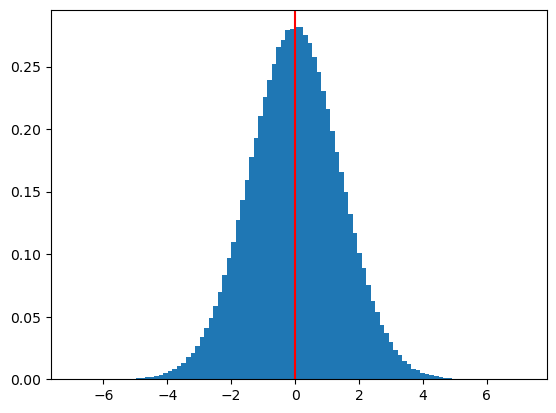

In [10]:
# distribution de WT
plt.hist(WT, bins=100, density=T);
plt.axvline(0, color='r')

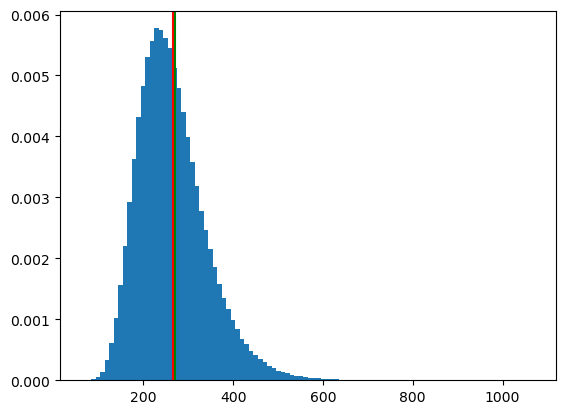

In [11]:
# distribution de ST
plt.hist(ST, bins=100, density=T);
plt.axvline(STvrai, color='r')
plt.axvline(K, color='g')

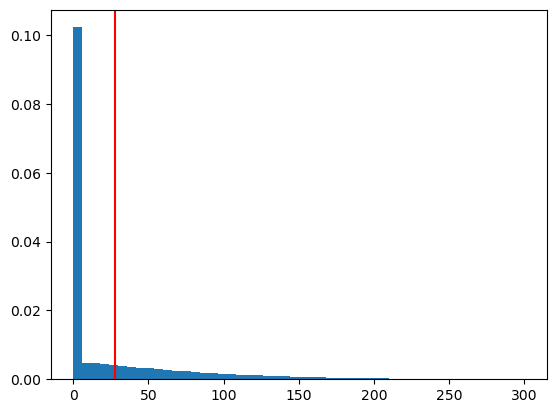

In [12]:
# distribution de CT
plt.hist(CT, bins=50, density=T, range=(0, 300));
CTvrai = C0vrai * np.exp(r * T)
plt.axvline(CTvrai, color='r')

(23.0, 28.0)

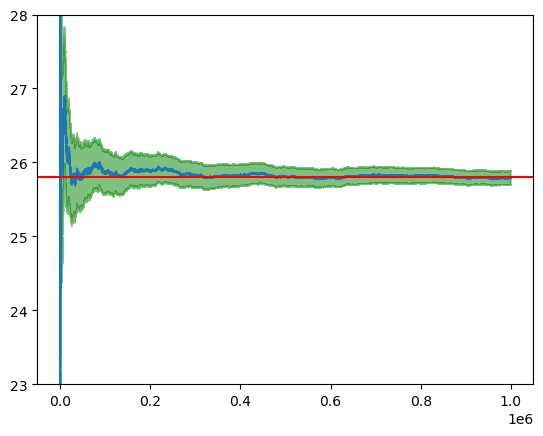

In [13]:
# étude de la convergence quand NMC -> infini
# somme cumulative de C0
C0partialmean = np.cumsum(C0) / np.arange(1, (NMC + 1))
# somme cumulative de C0**2
C0partialsquare = np.cumsum(C0 ** 2)
# écart-type cumulatif
sigmapartial = np.sqrt(C0partialsquare / np.arange(1, (NMC + 1)) - C0partialmean ** 2)
# intervalle de confiance
erreur = z * sigmapartial / np.sqrt(np.arange(1, NMC + 1))
plt.plot(C0partialmean)
plt.fill_between(np.arange(1, NMC + 1), C0partialmean + erreur, C0partialmean - erreur, color='g', alpha=0.5)
plt.axhline(C0vrai, color='r')
plt.ylim(23, 28)

In [14]:
# transformation de l'échantillon avec Girsanov
# échantillon original de C0:
C0 = np.exp(-r * T) * np.maximum(S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * WT) - K, 0)
# échantillon modifié
alpha = 0.1
C0new = np.exp(-r * T) * np.maximum(S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * (WT + alpha * T)) - K, 0) \
        * np.exp(-alpha * WT - alpha ** 2 * T / 2)
# comparaison des moyennes
print("La moyenne de l'échantillon original est = ", np.mean(C0))
print("La moyenne de l'échantillon modifié est = ", np.mean(C0new))
# comparaison des écarts types
print("L'écart-type de l'échantillon original est = ", np.std(C0))
print("L'écart-type de l'échantillon modifié est = ", np.std(C0new))

La moyenne de l'échantillon original est =  25.787844773214548
La moyenne de l'échantillon modifié est =  25.78537501751553
L'écart-type de l'échantillon original est =  46.910321090448036
L'écart-type de l'échantillon modifié est =  39.657637614519636


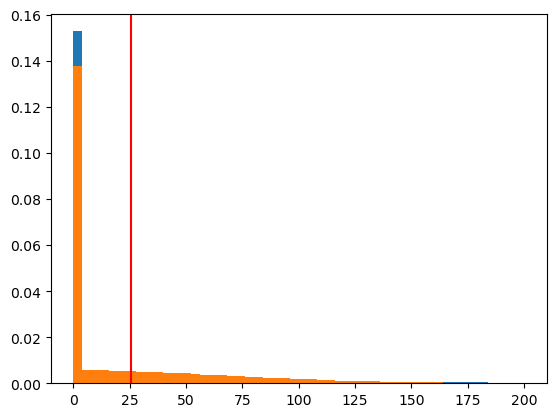

In [15]:
# compare C0 to C0new with histogram
plt.hist(C0, bins=50, density=True, range=(0, 200));
plt.hist(C0new, bins=50, density=True, range=(0, 200));
plt.axvline(C0vrai, color='r')

# Résolution par EDP

In [16]:
# paramètres financiers
S0 = 247.12
r = 0.035
sigma = 0.2
T = 2.
K = 269.99

In [17]:
# paramètres numériques
N = 100  # nb de points en prix
M = 100  # nb de points en temps
Smax = 1000  # prix max du sous-jacent pour la résolution
dt = T / M
ds = Smax / N
print(f"Pas de temps = {dt}, pas d'espace = {ds}")

Pas de temps = 0.02, pas d'espace = 10.0


In [18]:
# valeurs de l'option
C = np.zeros((N + 1, M + 1))
# tableau des prix
S = ds * np.arange(N + 1)
# tableau des temps
t = dt * np.arange(M + 1)
# prix finaux à t=T (échéance)
C[M, :] = np.maximum(S - K, 0)
# conditions aux limites en prix
C[:, 0] = 0
C[:, N] = Smax - K * np.exp(-r * (T - t))

In [24]:
C

array([[0.00000000e+00, 3.59654991e-02, 2.54393873e-03, ...,
        2.20532082e+01, 1.14451574e+01, 7.48262993e+02],
       [0.00000000e+00, 3.56418249e-02, 2.49909250e-03, ...,
        2.22409857e+01, 1.15384111e+01, 7.48086715e+02],
       [0.00000000e+00, 3.53174879e-02, 2.45454669e-03, ...,
        2.24318772e+01, 1.16332132e+01, 7.47910314e+02],
       ...,
       [0.00000000e+00, 7.97370505e-04, 1.90098091e-06, ...,
        3.06681975e+02, 1.66166230e+02, 7.30387722e+02],
       [0.00000000e+00, 3.99122629e-04, 6.35236247e-07, ...,
        4.38945407e+02, 2.74368325e+02, 7.30198927e+02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.10010000e+02, 7.20010000e+02, 7.30010000e+02]])

In [25]:
A = np.diag(-1 / dt - sigma ** 2 / ds ** 2 * S[1:N]**2 - r * S[1:N] /ds - r) \
    + np.diag(0.5 * (sigma / ds) ** 2 * S[1: N - 1] ** 2 + r/ds *S[1:N-1], 1) \
    + np.diag(0.5 * (sigma / ds) ** 2 * S[2:N] ** 2, -1)
A

array([[-5.01100e+01,  5.50000e-02,  0.00000e+00, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       [ 8.00000e-02, -5.02650e+01,  1.50000e-01, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       [ 0.00000e+00,  1.80000e-01, -5.05000e+01, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       ...,
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ..., -4.29790e+02,
         1.91575e+02,  0.00000e+00],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  1.92080e+02,
        -4.37625e+02,  1.95510e+02],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, ...,  0.00000e+00,
         1.96020e+02, -4.45540e+02]])

In [21]:
for i in range(M - 1, -1, -1):
    # vecteur du second membre
    b = -1 / dt * C[i + 1, 1:N]
    # conditions aux limites
    b[0] += -0.5 * (sigma / ds) ** 2 * S[1] ** 2
    b[N - 2] += -0.5 * (sigma / ds) ** 2 * S[N - 1] ** 2 - r / ds * S[N - 1]
    # résolution du système Ax=b
    C[i, 1:N] = np.linalg.solve(A, b)

C[0, :]


array([0.00000000e+00, 3.59654991e-02, 2.54393873e-03, 2.61435787e-04,
       3.48304969e-05, 8.41707914e-06, 2.81034569e-05, 1.84132001e-04,
       9.52821706e-04, 3.93364123e-03, 1.34148365e-02, 3.89209805e-02,
       9.84540585e-02, 2.21620045e-01, 4.51572240e-01, 8.44893719e-01,
       1.46910394e+00, 2.39814016e+00, 3.70666090e+00, 5.46420567e+00,
       7.73013344e+00, 1.05499610e+01, 1.39533625e+01, 1.79537748e+01,
       2.25493368e+01, 2.77247789e+01, 3.34538657e+01, 3.97020349e+01,
       4.64289587e+01, 5.35908352e+01, 6.11423029e+01, 6.90379331e+01,
       7.72333064e+01, 8.56857099e+01, 9.43545094e+01, 1.03201260e+02,
       1.12189619e+02, 1.21285112e+02, 1.30454820e+02, 1.39667007e+02,
       1.48890750e+02, 1.58095576e+02, 1.67251139e+02, 1.76326953e+02,
       1.85292181e+02, 1.94115495e+02, 2.02765004e+02, 2.11208248e+02,
       2.19412257e+02, 2.27343672e+02, 2.34968913e+02, 2.42254392e+02,
       2.49166765e+02, 2.55673209e+02, 2.61741717e+02, 2.67341403e+02,
      

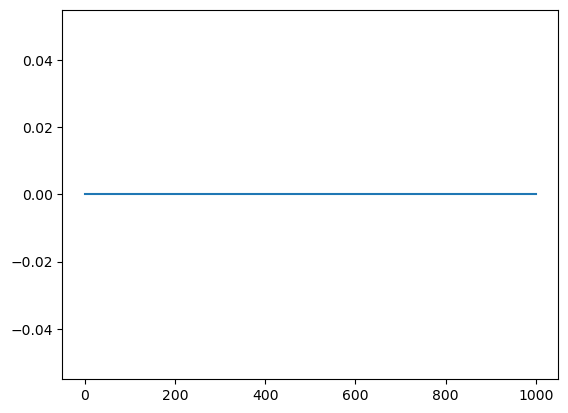

In [22]:
plt.plot(S, C[:, 0])